# Preface

Nama: Karmenia Ditabaya Lontoh

Batch: HCK-021

Objectives: Saya adalah Data Scientist baru di Amerika Serikat. Menyadari tingginya biaya perawatan kesehatan, saya tertarik untuk mendapatkan asuransi kesehatan. Namun, saya tidak tahu estimasi premi yang harus dibayar. Saya berencana memprediksi biaya premi asuransi dengan model Machine Learning berdasarkan data biaya asuransi dari publik.

# Problem Identification

## SMART Framework

1. **Specific**: Membangun model Machine Learning untuk memprediksi premi asuransi kesehatan tahunan berdasarkan variabel seperti usia, jenis kelamin, BMI, jumlah anak, status merokok, dan wilayah.

2. **Measurable**: Kesuksesan diukur dengan metrik dengan target meminimalkan error prediksi.

3. **Achievable**: Model menggunakan dataset publik dengan 1,338 entri dan menerapkan algoritma regresi yang sesuai.

4. **Relevant**: Prediksi premi asuransi penting untuk membantu individu dalam perencanaan keuangan dan biaya kesehatan di AS.

5. **Time-bound**: Pengembangan machine learning akan dilakukan selama kurang lebih 1 minggu.

## Problem Statement

Memprediksi premi asuransi kesehatan tahunan menggunakan model Machine Learning berdasarkan variabel seperti usia, jenis kelamin, BMI, jumlah anak, dan status merokok, untuk membantu individu memahami dan mengelola biaya perawatan kesehatan.

## Problem Breakdown

1. Hubungan antara Variabel Numerik
   - Apakah terdapat korelasi signifikan antara usia (`age`) dan BMI (`bmi`)?
   - Bagaimana pengaruh jumlah anak (`children`) terhadap besarnya premi asuransi (`charges`)?
   - Apakah BMI berkorelasi dengan premi asuransi (`charges`)?
   - Apakah usia mempengaruhi besarnya premi asuransi (`charges`)?
   - Apakah jumlah anak berkorelasi dengan usia (`age`)?

2. Hubungan antara Variabel Numerik dan Kategorikal
   - Apakah terdapat perbedaan signifikan dalam rata-rata BMI antara laki-laki dan perempuan (`sex`)?
   - Apakah status perokok (`smoker`) berpengaruh terhadap besarnya premi asuransi (`charges`)? 
   - Apakah perokok cenderung memiliki premi asuransi yang lebih tinggi dibandingkan non-perokok?
   - Apakah usia rata-rata berbeda antara perokok dan non-perokok?
   - Apakah terdapat perbedaan premi signifikan antara wilayah yang berbeda?
   - Apakah BMI berbeda di setiap wilayah (`region`)?

3. Hubungan antara Variabel Kategorikal
   - Apakah proporsi perokok lebih tinggi di wilayah tertentu (`region`) dibandingkan wilayah lainnya?
   - Apakah terdapat lebih banyak perokok di antara laki-laki dibandingkan perempuan?
   - Apakah distribusi jenis kelamin (`sex`) berbeda di setiap wilayah (`region`)?


## Machine Learning Model

Dalam pengembangan machine learning ini, model **regresi** digunakan untuk memprediksi harga premi. Regresi memungkinkan pemahaman dan prediksi hubungan antara variabel-variabel seperti usia, BMI, status perokok, dan wilayah dengan harga premi. Model regresi efektif dalam memprediksi nilai kontinu seperti premi asuransi berdasarkan data pelanggan, serta mengidentifikasi pola risiko yang mempengaruhi biaya premi.

# Libraries

Dalam pengembangan machine learning, dibutuhkan libraries berikut:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency


Import libraries berhasil dilakukan.

# Data Loading

Dataset yang digunakan dalam pengembangan machine learning dapat dimuat ke dalam program menggunakan fungsi untuk membaca file CSV.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Dataset berhasil disimpan pada variabel df.

# Data Exploration

## Summary Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Berdasarkan ringkasan informasi, didapatkan insight sebagai berikut:

1. Jumlah entri: Terdapat 1.338 entri dalam dataset, menunjukkan ukuran sampel yang cukup untuk analisis.
2. Tidak ada missing values: Semua kolom memiliki nilai lengkap, meningkatkan kualitas data dan keandalan analisis.
3. Kolom numerik: Terdapat dua kolom numerik (age dan bmi) dan satu kolom target (charges) yang dapat digunakan untuk analisis regresi.
4. Kolom kategorikal: Terdapat tiga kolom kategorikal (sex, smoker, dan region) yang dapat dianalisis untuk memahami pengaruh demografis terhadap biaya premi.
5. Kesiapan untuk analisis: Kualitas data yang baik menunjukkan kesiapan untuk analisis lebih lanjut dan pemodelan machine learning.

In [4]:
# Mengecek 5 nilai unik pertama di setiap kolom
unique_values = df.apply(lambda x: x.unique()[:10])

# Menampilkan 5 nilai unik pertama di setiap kolom
for column, values in unique_values.items():
    print(f"'{column}': {values.tolist()}")

'age': [19, 18, 28, 33, 32, 31, 46, 37, 60, 25]
'sex': ['female', 'male']
'bmi': [27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.44, 27.74, 29.83, 25.84]
'children': [0, 1, 3, 2, 5, 4]
'smoker': ['yes', 'no']
'region': ['southwest', 'southeast', 'northwest', 'northeast']
'charges': [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 7281.5056, 6406.4107, 28923.13692]


Berdasarkan data yang disediakan, berikut adalah insight singkat:

1. Variasi Umur: Rentang umur dari 18 hingga 60 tahun menunjukkan keragaman profil risiko.
2. BMI Beragam: Nilai BMI antara 22,705 dan 33,77 menunjukkan potensi risiko kesehatan yang berbeda.
3. Jumlah Anak: Beberapa individu tidak memiliki anak, sementara yang lain memiliki hingga lima anak, mempengaruhi biaya premi.
4. Status Merokok: Ada perbedaan biaya premi yang signifikan antara perokok dan non-perokok.
5. Distribusi Wilayah: Data mencakup beberapa wilayah yang dapat memengaruhi biaya premi.
6. Biaya Premi Beragam: Variasi biaya premi dari 1.725,55 hingga 28.923,14 menunjukkan potensi risiko yang kompleks.
7. Pola Risiko: Dataset dapat dianalisis untuk memahami pola risiko terkait biaya premi asuransi.
8. Data cleaning: Dataset ini tidak memerlukan data cleaning karena semua kolom memiliki tipe data yang sesuai, format nilai yang konsisten, tidak ada nilai kosong, outlier terkelola, dan tidak terdapat duplikasi.

In [5]:
# Cek statistik sederhana pada dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Exploratory Data Analysis (EDA)

## Functions

Untuk mempermudah proses eksplorasi data (EDA), maka, dibuat fungsi untuk memeriksa outlier, menganalisis distribusi variabel, dan mengecek missing value.

### Function Cek Outlier

In [6]:
def cek_outlier(column):
    print(f"\n{'====='*40}")  # Pemisah antar variabel
    print(f"\nAnalisis Outlier untuk Kolom: '{column.name}'")
    
    if pd.api.types.is_numeric_dtype(column):
        # Cek skewness
        skew_value = column.skew()
        
        # Untuk distribusi normal (skewness < |±0.5|)
        if abs(skew_value) < 0.5:
            print(f"Distribusi Kolom '{column.name}' dianggap normal (Skewness = {skew_value:.3f})")
            mean = column.mean()
            std = column.std()
            
            # Hitung batas untuk outlier menggunakan Z-Score
            upper_bound = mean + 3 * std
            lower_bound = mean - 3 * std
            
            # Hitung jumlah dan persentase outlier
            outliers_z = column[(column > upper_bound) | (column < lower_bound)]
            outlier_count_z = outliers_z.count()
            total_count = column.count()
            outlier_percentage_z = (outlier_count_z / total_count) * 100
            
            # Tampilkan boxplot
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=column)
            plt.title(f"Boxplot Kolom '{column.name}' (Z-Score)")
            plt.xlabel(column.name)
            plt.show()
            
            # Tampilkan informasi outlier
            print(f"Jumlah Outlier (Z-Score): {outlier_count_z} dari {total_count} total data")
            print(f"Persentase Outlier (Z-Score): {outlier_percentage_z:.2f}%")
        
        # Untuk distribusi skewed (skewness > |±0.5|)
        else:
            print(f"Distribusi Kolom '{column.name}' tidak normal (Skewness = {skew_value:.3f})")
            Q1 = column.quantile(0.25)
            Q3 = column.quantile(0.75)
            IQR = Q3 - Q1
            
            # Hitung batas untuk outlier menggunakan Tukey's Rule
            upper_bound = Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            
            # Hitung jumlah dan persentase outlier
            outliers_tukey = column[(column > upper_bound) | (column < lower_bound)]
            outlier_count_tukey = outliers_tukey.count()
            total_count = column.count()
            outlier_percentage_tukey = (outlier_count_tukey / total_count) * 100
            
            # Tampilkan boxplot
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=column)
            plt.title(f"Boxplot Kolom '{column.name}' (Tukey's Rule)")
            plt.xlabel(column.name)
            plt.show()
            
            # Tampilkan informasi outlier
            print(f"Jumlah Outlier (Tukey's Rule): {outlier_count_tukey} dari {total_count} total data")
            print(f"Persentase Outlier (Tukey's Rule): {outlier_percentage_tukey:.2f}%")

Fungsi `cek_outlier` digunakan untuk menganalisis outlier dalam sebuah kolom pada DataFrame. Fungsi ini mengidentifikasi dan menghitung jumlah serta persentase outlier berdasarkan dua metode: **Z-Score** untuk distribusi normal dan **Tukey's Rule** untuk distribusi yang skewed. Berikut adalah penjelasan detail tentang bagaimana fungsi ini bekerja:

**Cara Kerja**

1. **Pemisah Output**:
   - Fungsi dimulai dengan mencetak pemisah untuk meningkatkan keterbacaan output.
   - Menampilkan nama kolom yang sedang dianalisis.

2. **Memeriksa Tipe Data**:
   - Fungsi memeriksa apakah kolom yang dianalisis adalah tipe numerik menggunakan `pd.api.types.is_numeric_dtype()`.

3. **Menghitung Skewness**:
   - Skewness kolom dihitung untuk menentukan apakah distribusi kolom tersebut normal atau tidak. 
   - Jika nilai skewness kurang dari |±0.5|, kolom dianggap memiliki distribusi normal.

4. **Distribusi Normal (Z-Score)**:
   - Jika kolom dianggap normal:
     - Rata-rata dan standar deviasi kolom dihitung.
     - Batas atas dan bawah untuk outlier dihitung menggunakan Z-Score: 
       - **Upper Bound**: `mean + 3 * std`
       - **Lower Bound**: `mean - 3 * std`
     - Jumlah dan persentase outlier dihitung dan ditampilkan.
     - Boxplot kolom ditampilkan untuk visualisasi outlier.

5. **Distribusi Skewed (Tukey's Rule)**:
   - Jika kolom tidak normal:
     - Kuartil pertama (Q1) dan kuartil ketiga (Q3) dihitung untuk menentukan IQR (Interquartile Range):
       - **IQR**: `Q3 - Q1`
     - Batas atas dan bawah untuk outlier dihitung menggunakan Tukey’s Rule:
       - **Upper Bound**: `Q3 + 1.5 * IQR`
       - **Lower Bound**: `Q1 - 1.5 * IQR`
     - Jumlah dan persentase outlier dihitung dan ditampilkan.
     - Boxplot kolom ditampilkan untuk visualisasi outlier.

### Function Cek Distribusi

In [7]:
def cek_distribusi(column):
    print(f"\n{'====='*40}")  # Pemisah antar variabel
    print(f"\nAnalisis untuk Kolom: '{column.name}'")
    
    if pd.api.types.is_numeric_dtype(column):
        # Cek skewness
        skew_value = column.skew()
        
        # Histogram dan KDE
        plt.figure(figsize=(10, 5))
        sns.histplot(column, kde=True, bins=30)
        plt.axvline(column.mean(), color='r', linestyle='--', label='Mean')
        plt.axvline(column.median(), color='g', linestyle='--', label='Median')
        plt.axvline(column.mode()[0], color='b', linestyle='--', label='Mode')
        
        plt.title(f"Distribusi Kolom '{column.name}' (Skewness = {skew_value:.3f})")
        plt.xlabel(column.name)
        plt.ylabel('Frekuensi')
        plt.legend()
        plt.show()
        
        # Menentukan distribusi normal atau tidak
        if abs(skew_value) < 0.5:
            print(f"Distribusi Kolom '{column.name}': Normal (Skewness = {skew_value:.3f})")
        else:
            print(f"Distribusi Kolom '{column.name}': Tidak Normal (Skewness = {skew_value:.3f})")
    
    elif pd.api.types.is_object_dtype(column):
        # Plot frekuensi untuk kolom objek
        plt.figure(figsize=(10, 5))
        value_counts = column.value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        
        plt.title(f"Frekuensi Kolom '{column.name}'")
        plt.xlabel(column.name)
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()
        
        unique_values = column.nunique()
        print(f"Kolom '{column.name}' memiliki {unique_values} nilai unik (Tipe: Object)")
    
    else:
        print(f"Kolom '{column.name}' tidak teridentifikasi sebagai numerik atau objek.")

Fungsi `cek_distribusi` digunakan untuk menganalisis distribusi dari kolom dalam sebuah DataFrame. Fungsi ini dapat menangani kolom dengan tipe numerik dan objek, serta menyediakan visualisasi dan informasi terkait distribusi data. Berikut adalah penjelasan detail tentang bagaimana fungsi ini bekerja:

Cara Kerja

1. **Pemisah Output**:
   - Fungsi dimulai dengan mencetak pemisah untuk meningkatkan keterbacaan output.
   - Menampilkan nama kolom yang sedang dianalisis.

2. **Memeriksa Tipe Data**:
   - Fungsi memeriksa apakah kolom yang dianalisis adalah tipe numerik atau objek menggunakan `pd.api.types.is_numeric_dtype()` dan `pd.api.types.is_object_dtype()`.

3. **Analisis untuk Kolom Numerik**:
   - **Menghitung Skewness**: Skewness kolom dihitung untuk menentukan apakah distribusi kolom tersebut normal atau tidak.
   - **Visualisasi Histogram dan KDE**:
     - Histogram dan Kernel Density Estimate (KDE) dari kolom ditampilkan.
     - Garis vertikal ditambahkan untuk menunjukkan nilai rata-rata (mean), median, dan modus (mode).
   - **Menentukan Distribusi**:
     - Jika nilai skewness kurang dari |±0.5|, distribusi dianggap normal.
     - Jika tidak, distribusi dianggap tidak normal, dan informasi tersebut ditampilkan.

4. **Analisis untuk Kolom Objek**:
   - Jika kolom adalah tipe objek:
     - Plot frekuensi nilai-nilai unik dalam kolom ditampilkan menggunakan barplot.
     - Menampilkan jumlah nilai unik yang terdapat dalam kolom.


### Function Cek Missing Value

In [8]:
def cek_missing_values(df):
    print(f"\n{'====='*40}")  # Pemisah antar variabel
    print("Analisis Missing Values:")
    
    # Hitung jumlah missing values
    missing_counts = df.isnull().sum()
    
    # Hitung persentase missing values
    total_count = df.shape[0]
    missing_percentage = (missing_counts / total_count) * 100
    
    # Buat DataFrame untuk menampilkan hasil
    missing_summary = pd.DataFrame({
        'Jumlah Missing': missing_counts,
        'Persentase Missing (%)': missing_percentage
    })
    
    # Tampilkan hanya kolom dengan nilai yang hilang
    missing_summary = missing_summary[missing_summary['Jumlah Missing'] > 0]
    
    # Tampilkan hasil
    if missing_summary.empty:
        print("Tidak ada nilai yang hilang dalam DataFrame.")
    else:
        print(missing_summary)

Fungsi ini bertujuan untuk menganalisis nilai yang hilang (missing values) dalam DataFrame yang diberikan. Berikut adalah langkah-langkah yang dilakukan dalam fungsi ini:

1. **Pemisah Antara Variabel**: Mencetak garis pemisah untuk memudahkan pembacaan output.
2. **Analisis Missing Values**: Menampilkan header untuk analisis nilai yang hilang.
3. **Menghitung Jumlah Missing Values**: 
   - Menggunakan `isnull().sum()` untuk menghitung jumlah nilai yang hilang pada setiap kolom dalam DataFrame.
4. **Menghitung Persentase Missing Values**: 
   - Menghitung persentase nilai yang hilang berdasarkan total jumlah baris dalam DataFrame.
5. **Membuat DataFrame Ringkasan**: 
   - Menggabungkan jumlah dan persentase nilai yang hilang ke dalam DataFrame baru bernama `missing_summary`.
6. **Filter DataFrame untuk Menampilkan Kolom yang Memiliki Nilai Hilang**: 
   - Menyaring `missing_summary` untuk hanya menampilkan kolom yang memiliki nilai yang hilang.
7. **Menampilkan Hasil**: 
   - Jika tidak ada nilai yang hilang, mencetak pesan yang menyatakan bahwa tidak ada nilai yang hilang.
   - Jika ada nilai yang hilang, mencetak ringkasan dari jumlah dan persentase nilai yang hilang.


In [9]:
def check_duplicates(df, subset=None):

    # Check for duplicate rows
    duplicate_rows = df[df.duplicated(subset=subset)]
    
    # Count the number of duplicate rows
    num_duplicates = duplicate_rows.shape[0]
    
    # Return the duplicate rows and the count
    return duplicate_rows, num_duplicates


### Function All

In [10]:
def analisis_kolom(df):
    # Dataframe untuk menyimpan hasil akhir
    result_data = []  # Simpan data dalam list, baru diubah ke DataFrame di akhir

    # Looping setiap kolom
    for column_name in df.columns:
        column = df[column_name]
        
        # Analisis Missing Values
        missing_count = column.isnull().sum()
        missing_percentage = (missing_count / len(column)) * 100
        
        # Analisis Outlier
        if pd.api.types.is_numeric_dtype(column) and column.notnull().all():
            # Cek skewness
            skew_value = column.skew()
            
            if abs(skew_value) < 0.5:
                # Distribusi normal, menggunakan Z-Score untuk outlier
                mean = column.mean()
                std = column.std()
                upper_bound = mean + 3 * std
                lower_bound = mean - 3 * std
                outliers = column[(column > upper_bound) | (column < lower_bound)]
            else:
                # Distribusi skewed, menggunakan Tukey's Rule untuk outlier
                Q1 = column.quantile(0.25)
                Q3 = column.quantile(0.75)
                IQR = Q3 - Q1
                upper_bound = Q3 + 1.5 * IQR
                lower_bound = Q1 - 1.5 * IQR
                outliers = column[(column > upper_bound) | (column < lower_bound)]
            
            outlier_count = len(outliers)
            outlier_percentage = round((outlier_count / len(column)) * 100, 2)
        else:
            outlier_count = 0
            outlier_percentage = 0
        
        # Analisis Distribusi
        if pd.api.types.is_numeric_dtype(column):
            skew_value = column.skew()
            if abs(skew_value) < 0.5:
                distribusi = 'Normal'
            else:
                distribusi = 'Tidak Normal'
        elif pd.api.types.is_object_dtype(column):
            distribusi = f"{column.nunique()} Nilai Unik"
        else:
            distribusi = 'Tidak Dikenal'
        
        # Tambahkan hasil analisis ke list
        result_data.append({
            'Kolom': column_name,
            'Jumlah Missing': missing_count,
            'Persentase Missing': missing_percentage,
            'Jumlah Outlier': outlier_count,
            'Persentase Outlier': outlier_percentage,
            'Distribusi': distribusi
        })
    # Menyimpan hasil analisis ke dataframe
    result_df = pd.DataFrame(result_data)

    return result_df

Fungsi ini bertujuan untuk menganalisis setiap kolom dalam DataFrame yang diberikan, dengan fokus pada nilai yang hilang, outlier, dan distribusi data. Berikut adalah langkah-langkah yang dilakukan dalam fungsi ini:

1. **Inisialisasi Hasil Akhir**:
   - Membuat list kosong `result_data` untuk menyimpan hasil analisis untuk setiap kolom.

2. **Looping Setiap Kolom**:
   - Melakukan iterasi melalui setiap kolom dalam DataFrame.

3. **Analisis Missing Values**:
   - Menghitung jumlah nilai yang hilang menggunakan `isnull().sum()`.
   - Menghitung persentase nilai yang hilang berdasarkan total jumlah baris.

4. **Analisis Outlier**:
   - Memeriksa apakah kolom memiliki tipe data numerik dan tidak mengandung nilai hilang.
   - Menghitung nilai skewness kolom untuk menentukan distribusi data.
   - Jika distribusi normal (skewness < 0.5), menggunakan Z-Score untuk mendeteksi outlier.
   - Jika distribusi skewed, menggunakan Tukey's Rule untuk mendeteksi outlier.
   - Menghitung jumlah dan persentase outlier.

5. **Analisis Distribusi**:
   - Menentukan jenis distribusi untuk kolom numerik dan objek.
   - Mengkategorikan kolom numerik sebagai 'Normal' atau 'Tidak Normal' berdasarkan nilai skewness.
   - Menghitung jumlah nilai unik untuk kolom objek.

6. **Menyimpan Hasil Analisis**:
   - Menambahkan hasil analisis untuk setiap kolom ke dalam list `result_data`.

## Distribusi Variabel



Analisis untuk Kolom: 'age'


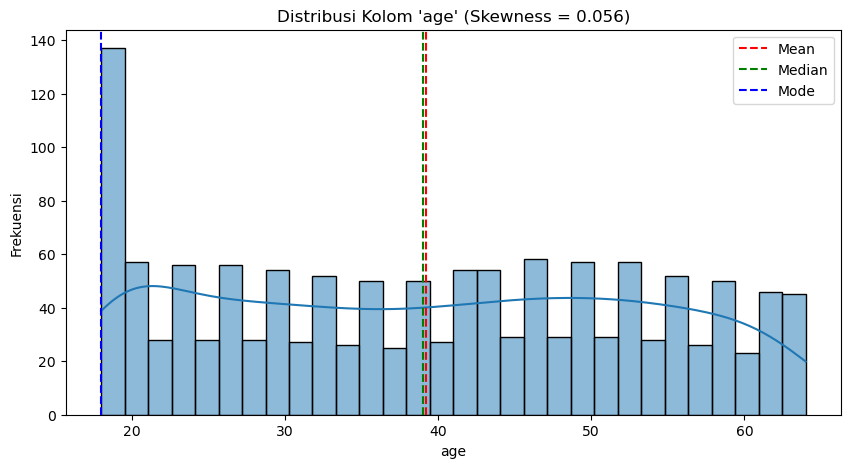

Distribusi Kolom 'age': Normal (Skewness = 0.056)


Analisis untuk Kolom: 'sex'


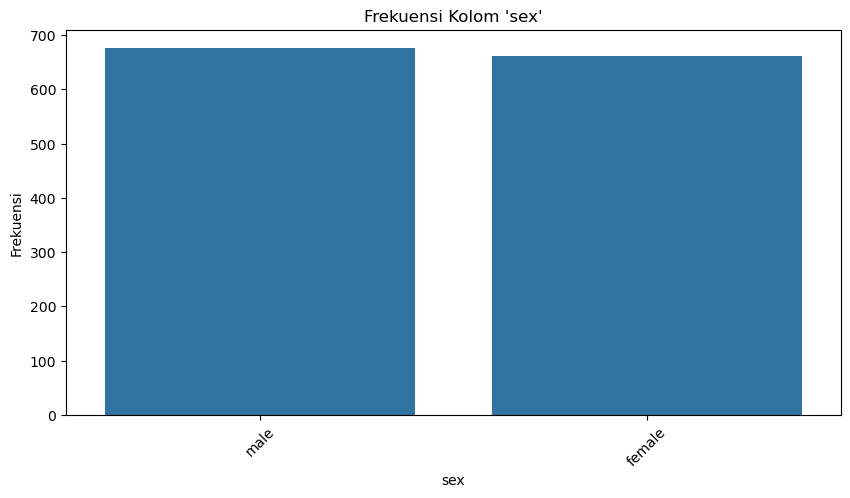

Kolom 'sex' memiliki 2 nilai unik (Tipe: Object)


Analisis untuk Kolom: 'bmi'


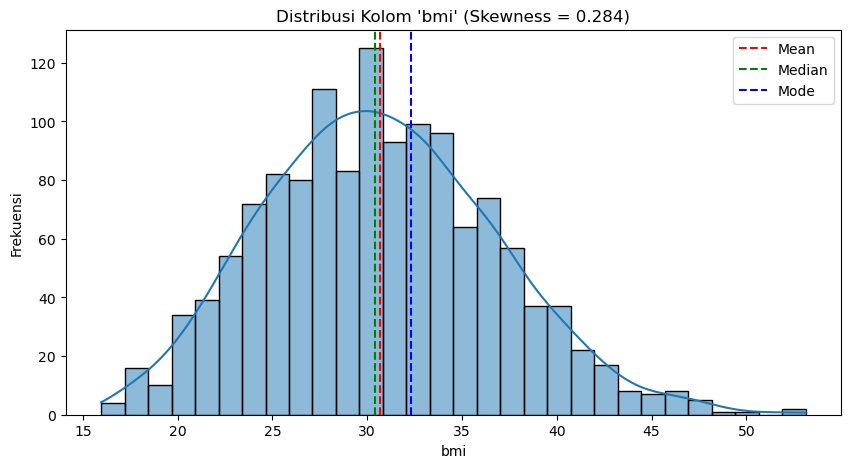

Distribusi Kolom 'bmi': Normal (Skewness = 0.284)


Analisis untuk Kolom: 'children'


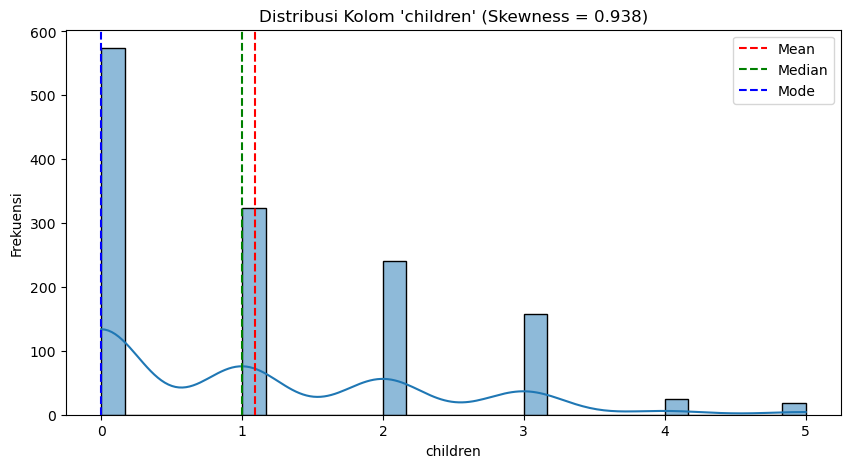

Distribusi Kolom 'children': Tidak Normal (Skewness = 0.938)


Analisis untuk Kolom: 'smoker'


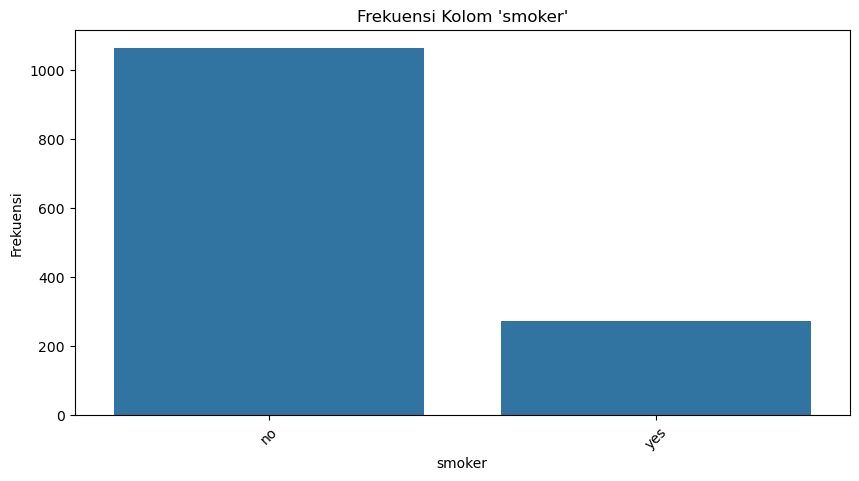

Kolom 'smoker' memiliki 2 nilai unik (Tipe: Object)


Analisis untuk Kolom: 'region'


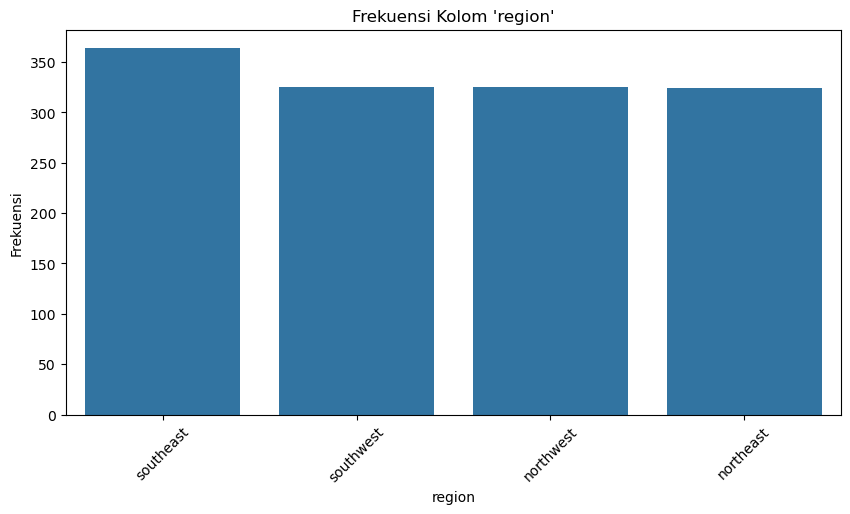

Kolom 'region' memiliki 4 nilai unik (Tipe: Object)


Analisis untuk Kolom: 'charges'


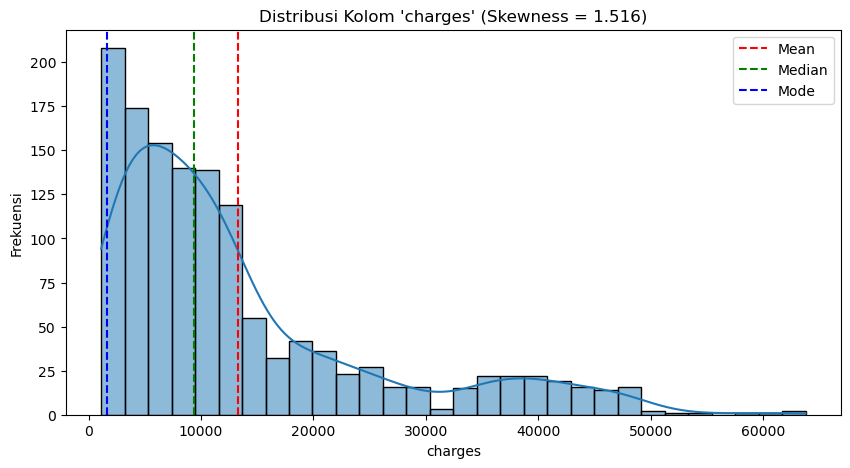

Distribusi Kolom 'charges': Tidak Normal (Skewness = 1.516)


In [11]:
# Cek distribusi untuk setiap kolom
for column in df.columns:
    cek_distribusi(df[column])

## Deteksi Missing Values

In [12]:
# Cek missing values
cek_missing_values(df)


Analisis Missing Values:
Tidak ada nilai yang hilang dalam DataFrame.


## Deteksi Outlier



Analisis Outlier untuk Kolom: 'age'
Distribusi Kolom 'age' dianggap normal (Skewness = 0.056)


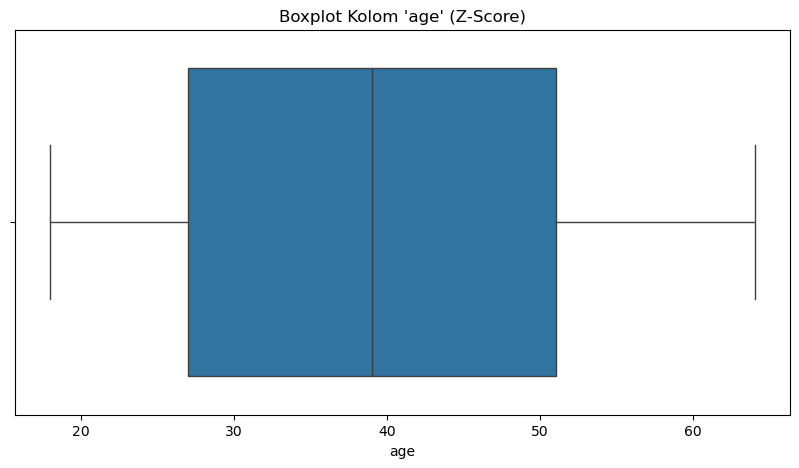

Jumlah Outlier (Z-Score): 0 dari 1338 total data
Persentase Outlier (Z-Score): 0.00%


Analisis Outlier untuk Kolom: 'bmi'
Distribusi Kolom 'bmi' dianggap normal (Skewness = 0.284)


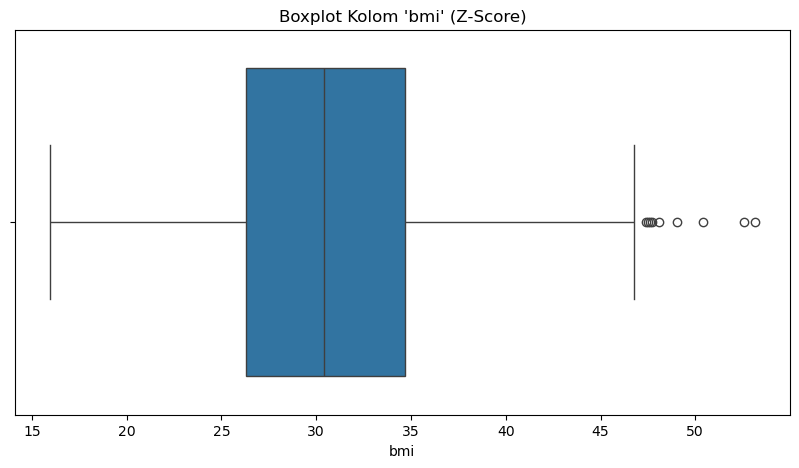

Jumlah Outlier (Z-Score): 4 dari 1338 total data
Persentase Outlier (Z-Score): 0.30%


Analisis Outlier untuk Kolom: 'children'
Distribusi Kolom 'children' tidak normal (Skewness = 0.938)


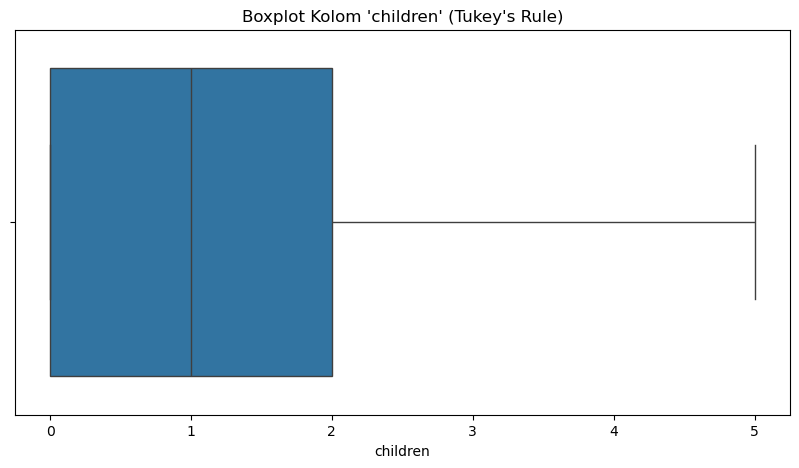

Jumlah Outlier (Tukey's Rule): 0 dari 1338 total data
Persentase Outlier (Tukey's Rule): 0.00%


Analisis Outlier untuk Kolom: 'charges'
Distribusi Kolom 'charges' tidak normal (Skewness = 1.516)


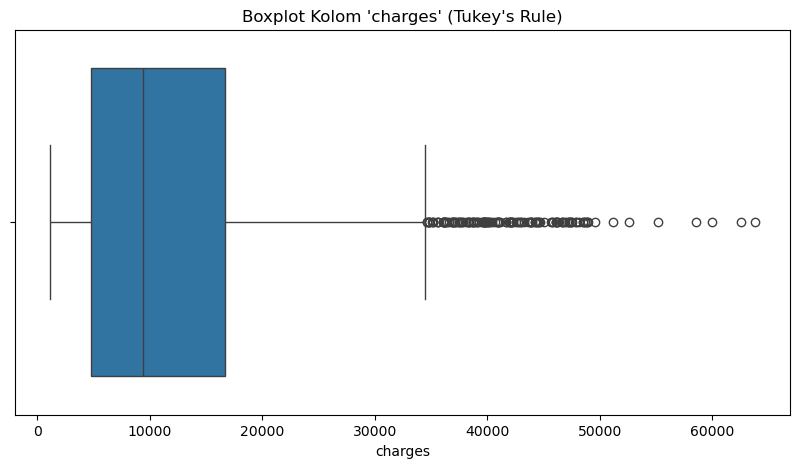

Jumlah Outlier (Tukey's Rule): 139 dari 1338 total data
Persentase Outlier (Tukey's Rule): 10.39%


In [13]:
for column_name in df.select_dtypes(include=[np.number]).columns:
    cek_outlier(df[column_name])

## Deteksi Duplicate Data

In [14]:
duplicates, total_duplicates = check_duplicates(df)
print(f"Total duplicates: {total_duplicates}")
duplicates

Total duplicates: 1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


## Problem Breakdown

In [31]:
result = analisis_kolom(df)
result

,Kolom,Jumlah Missing,Persentase Missing,Jumlah Outlier,Persentase Outlier,Distribusi
0,age,0,0.0,0,0.00,Normal
1,sex,0,0.0,0,0.00,2 Nilai Unik
2,bmi,0,0.0,4,0.30,Normal
3,children,0,0.0,0,0.00,Tidak Normal
4,smoker,0,0.0,0,0.00,2 Nilai Unik
5,region,0,0.0,0,0.00,4 Nilai Unik
6,charges,0,0.0,139,10.39,Tidak Normal


### Hubungan antara variabel numerik

#### Apakah ada korelasi antara usia dan BMI?

Koefisien Korelasi antara Usia dan BMI: 0.11
Ada korelasi signifikan antara usia dan BMI.


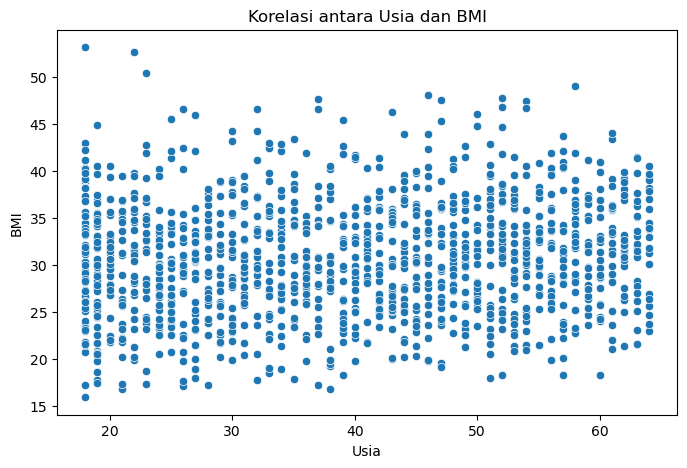

In [17]:
# Korelasi antara usia dan BMI
corr_age_bmi, p_value_age_bmi = stats.pearsonr(df['age'], df['bmi'])
print(f"Koefisien Korelasi antara Usia dan BMI: {corr_age_bmi:.2f}")
if p_value_age_bmi < 0.05:
    print("Ada korelasi signifikan antara usia dan BMI.")
else:
    print("Tidak ada korelasi signifikan antara usia dan BMI.")

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Korelasi antara Usia dan BMI')
plt.xlabel('Usia')
plt.ylabel('BMI')
plt.show()

#### Bagaimana pengaruh jumlah anak (children) terhadap besarnya premi asuransi (charges)?

Koefisien Korelasi Spearman antara Jumlah Anak dan Premi Asuransi: 0.13
Ada korelasi signifikan antara jumlah anak dan premi asuransi.


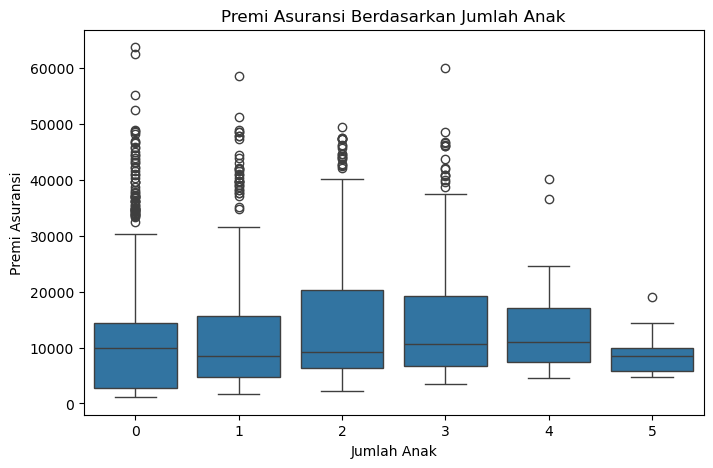

In [27]:
# Korelasi antara jumlah anak dan premi asuransi
corr_children_charges, p_value_children_charges = stats.spearmanr(df['children'], df['charges'])
print(f"Koefisien Korelasi Spearman antara Jumlah Anak dan Premi Asuransi: {corr_children_charges:.2f}")
if p_value_children_charges < 0.05:
    print("Ada korelasi signifikan antara jumlah anak dan premi asuransi.")
else:
    print("Tidak ada korelasi signifikan antara jumlah anak dan premi asuransi.")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Premi Asuransi Berdasarkan Jumlah Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('Premi Asuransi')
plt.show()

#### Apakah BMI berkorelasi dengan premi asuransi (charges)?

Koefisien Korelasi Spearman antara BMI dan Premi Asuransi: 0.12
Ada korelasi signifikan antara BMI dan premi asuransi.


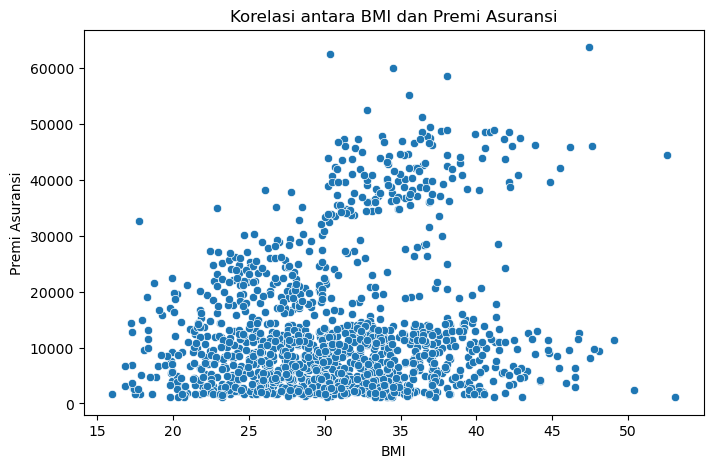

In [28]:
# Korelasi antara BMI dan premi asuransi
corr_bmi_charges, p_value_bmi_charges = stats.spearmanr(df['bmi'], df['charges'])
print(f"Koefisien Korelasi Spearman antara BMI dan Premi Asuransi: {corr_bmi_charges:.2f}")
if p_value_bmi_charges < 0.05:
    print("Ada korelasi signifikan antara BMI dan premi asuransi.")
else:
    print("Tidak ada korelasi signifikan antara BMI dan premi asuransi.")

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Korelasi antara BMI dan Premi Asuransi')
plt.xlabel('BMI')
plt.ylabel('Premi Asuransi')
plt.show()

#### Apakah usia mempengaruhi besarnya premi asuransi (charges)?

Koefisien Korelasi Spearman antara Usia dan Premi Asuransi: 0.53
Ada korelasi signifikan antara usia dan premi asuransi.


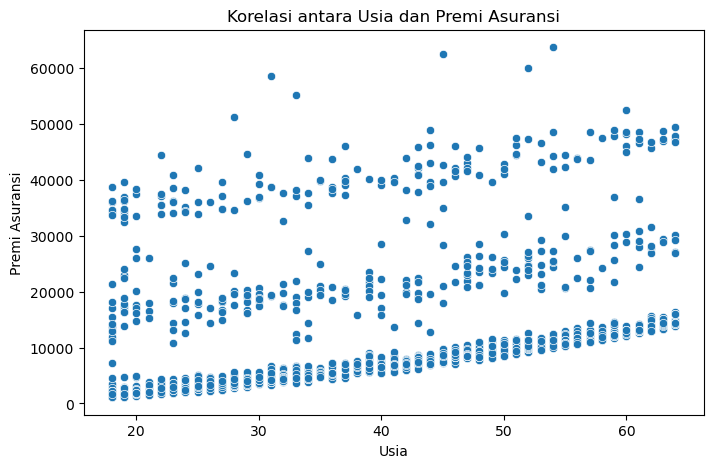

In [29]:
# Korelasi antara usia dan premi asuransi
corr_age_charges, p_value_age_charges = stats.spearmanr(df['age'], df['charges'])
print(f"Koefisien Korelasi Spearman antara Usia dan Premi Asuransi: {corr_age_charges:.2f}")
if p_value_age_charges < 0.05:
    print("Ada korelasi signifikan antara usia dan premi asuransi.")
else:
    print("Tidak ada korelasi signifikan antara usia dan premi asuransi.")

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Korelasi antara Usia dan Premi Asuransi')
plt.xlabel('Usia')
plt.ylabel('Premi Asuransi')
plt.show()

#### Apakah jumlah anak berkorelasi dengan usia (age)?

Koefisien Korelasi Spearman antara Jumlah Anak dan Usia: 0.06
Ada korelasi signifikan antara jumlah anak dan usia.


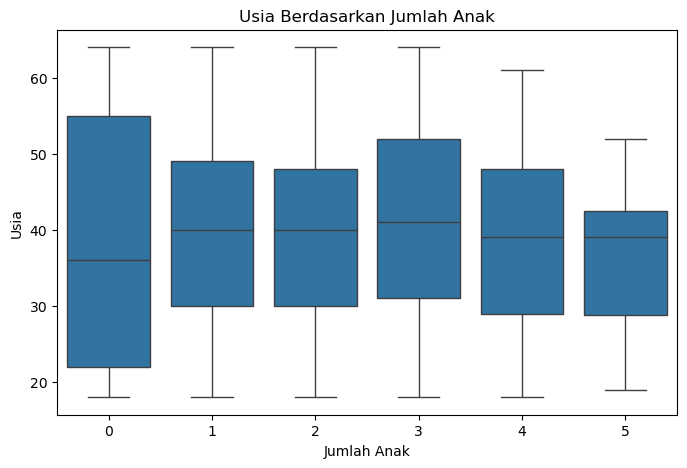

In [30]:
# Korelasi antara jumlah anak dan usia
corr_children_age, p_value_children_age = stats.spearmanr(df['children'], df['age'])
print(f"Koefisien Korelasi Spearman antara Jumlah Anak dan Usia: {corr_children_age:.2f}")
if p_value_children_age < 0.05:
    print("Ada korelasi signifikan antara jumlah anak dan usia.")
else:
    print("Tidak ada korelasi signifikan antara jumlah anak dan usia.")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='age', data=df)
plt.title('Usia Berdasarkan Jumlah Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('Usia')
plt.show()

### Hubungan antara Variabel Numerik dan Kategorikal 

#### Apakah terdapat perbedaan signifikan dalam rata-rata BMI antara laki-laki dan perempuan (sex)?

Perbedaan rata-rata BMI antara laki-laki dan perempuan: t-stat=1.70, p-value=0.09
Tidak ada perbedaan signifikan dalam rata-rata BMI antara laki-laki dan perempuan.



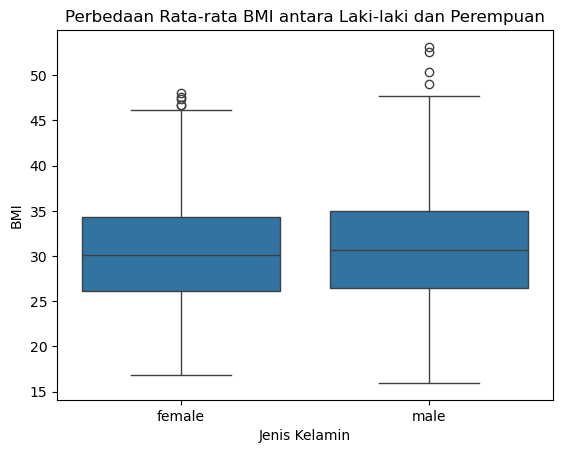

In [50]:
# 1. Perbedaan Rata-rata BMI antara Laki-laki dan Perempuan
bmi_male = df[df['sex'] == 'male']['bmi']
bmi_female = df[df['sex'] == 'female']['bmi']

t_stat_bmi_sex, p_value_bmi_sex = stats.ttest_ind(bmi_male, bmi_female)
print(f"Perbedaan rata-rata BMI antara laki-laki dan perempuan: t-stat={t_stat_bmi_sex:.2f}, p-value={p_value_bmi_sex:.2f}")
if p_value_bmi_sex < 0.05:
    print("Ada perbedaan signifikan dalam rata-rata BMI antara laki-laki dan perempuan.\n")
else:
    print("Tidak ada perbedaan signifikan dalam rata-rata BMI antara laki-laki dan perempuan.\n")

# Plot perbedaan rata-rata BMI
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Perbedaan Rata-rata BMI antara Laki-laki dan Perempuan')
plt.xlabel('Jenis Kelamin')
plt.ylabel('BMI')
plt.show()

#### Apakah status perokok (smoker) berpengaruh terhadap besarnya premi asuransi (charges)?

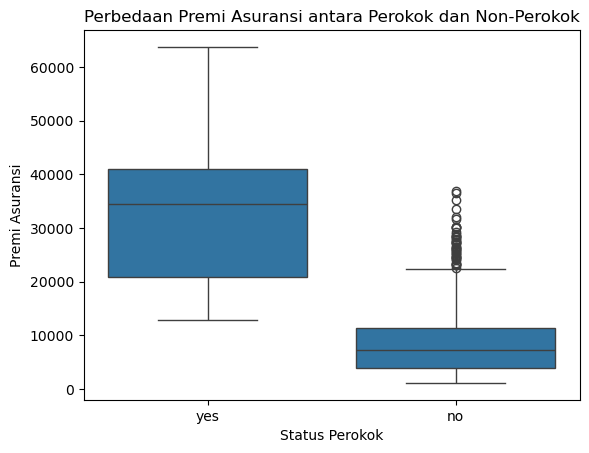

ANOVA charges antara perokok dan non-perokok: F-stat=2177.61, p-value=0.00
Eta Squared untuk perbedaan charges: 0.62
Ada perbedaan signifikan dalam premi asuransi antara perokok dan non-perokok.



In [42]:
# 2. ANOVA untuk charges berdasarkan status perokok
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Perbedaan Premi Asuransi antara Perokok dan Non-Perokok')
plt.xlabel('Status Perokok')
plt.ylabel('Premi Asuransi')
plt.show()

# ANOVA
f_stat_charges_smoker, p_value_charges_smoker = stats.f_oneway(
    df[df['smoker'] == 'yes']['charges'],
    df[df['smoker'] == 'no']['charges']
)

print(f"ANOVA charges antara perokok dan non-perokok: F-stat={f_stat_charges_smoker:.2f}, p-value={p_value_charges_smoker:.2f}")

# Hitung Eta Squared untuk efek ukuran
eta_charges_smoker = f_stat_charges_smoker / (f_stat_charges_smoker + df[df['smoker'] == 'yes']['charges'].count() + df[df['smoker'] == 'no']['charges'].count() - 2)
print(f"Eta Squared untuk perbedaan charges: {eta_charges_smoker:.2f}")

if p_value_charges_smoker < 0.05:
    print("Ada perbedaan signifikan dalam premi asuransi antara perokok dan non-perokok.\n")
else:
    print("Tidak ada perbedaan signifikan dalam premi asuransi antara perokok dan non-perokok.\n")


#### Apakah usia rata-rata berbeda antara perokok dan non-perokok?

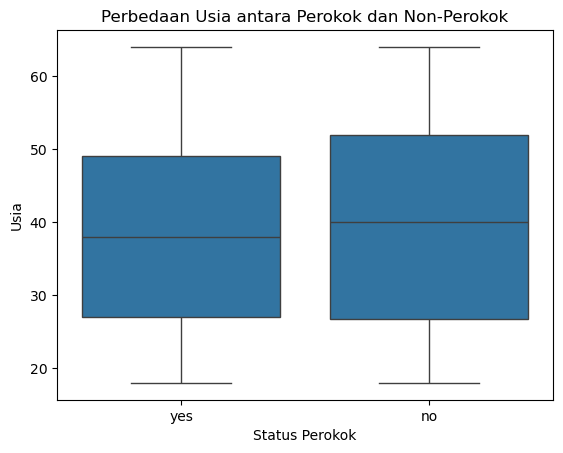

ANOVA Usia antara perokok dan non-perokok: F-stat=0.84, p-value=0.36
Eta Squared untuk perbedaan usia: 0.00
Tidak ada perbedaan signifikan dalam usia rata-rata antara perokok dan non-perokok.



In [46]:
# 3. ANOVA untuk usia rata-rata antara perokok dan non-perokok
sns.boxplot(x='smoker', y='age', data=df)
plt.title('Perbedaan Usia antara Perokok dan Non-Perokok')
plt.xlabel('Status Perokok')
plt.ylabel('Usia')
plt.show()

# ANOVA
f_stat_age_smoker, p_value_age_smoker = stats.f_oneway(
    df[df['smoker'] == 'yes']['age'],
    df[df['smoker'] == 'no']['age']
)

print(f"ANOVA Usia antara perokok dan non-perokok: F-stat={f_stat_age_smoker:.2f}, p-value={p_value_age_smoker:.2f}")

# Hitung Eta Squared untuk efek ukuran
eta_age_smoker = f_stat_age_smoker / (f_stat_age_smoker + df[df['smoker'] == 'yes']['age'].count() + df[df['smoker'] == 'no']['age'].count() - 2)
print(f"Eta Squared untuk perbedaan usia: {eta_age_smoker:.2f}")

if p_value_age_smoker < 0.05:
    print("Ada perbedaan signifikan dalam usia rata-rata antara perokok dan non-perokok.\n")
else:
    print("Tidak ada perbedaan signifikan dalam usia rata-rata antara perokok dan non-perokok.\n")


#### Apakah terdapat perbedaan premi signifikan antara wilayah yang berbeda?

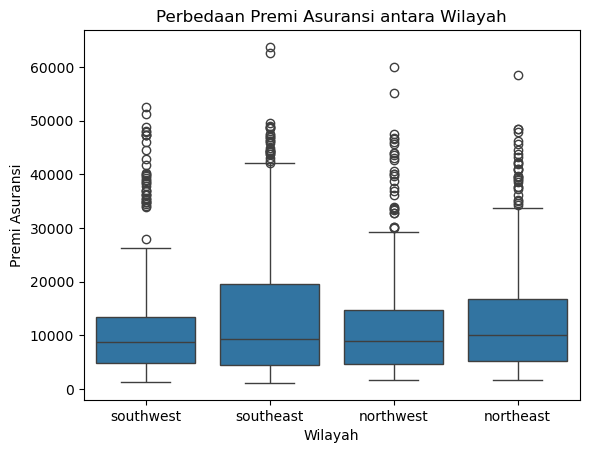

ANOVA charges antara wilayah: F-stat=nan, p-value=nan
Eta Squared untuk perbedaan charges di wilayah: nan
Tidak ada perbedaan signifikan dalam premi asuransi antara wilayah yang berbeda.



/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [44]:
# 4. ANOVA untuk charges berdasarkan region
sns.boxplot(x='region', y='charges', data=df)
plt.title('Perbedaan Premi Asuransi antara Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Premi Asuransi')
plt.show()

# ANOVA
f_stat_charges_region, p_value_charges_region = stats.f_oneway(
    df[df['region'] == 'north']['charges'],
    df[df['region'] == 'south']['charges'],
    df[df['region'] == 'east']['charges'],
    df[df['region'] == 'west']['charges']
)

print(f"ANOVA charges antara wilayah: F-stat={f_stat_charges_region:.2f}, p-value={p_value_charges_region:.2f}")

# Hitung Eta Squared untuk efek ukuran
eta_charges_region = f_stat_charges_region / (f_stat_charges_region + 
    df[df['region'] == 'north']['charges'].count() + 
    df[df['region'] == 'south']['charges'].count() + 
    df[df['region'] == 'east']['charges'].count() + 
    df[df['region'] == 'west']['charges'].count() - 4)
print(f"Eta Squared untuk perbedaan charges di wilayah: {eta_charges_region:.2f}")

if p_value_charges_region < 0.05:
    print("Ada perbedaan signifikan dalam premi asuransi antara wilayah yang berbeda.\n")
else:
    print("Tidak ada perbedaan signifikan dalam premi asuransi antara wilayah yang berbeda.\n")


#### Apakah BMI berbeda di setiap wilayah (region)?

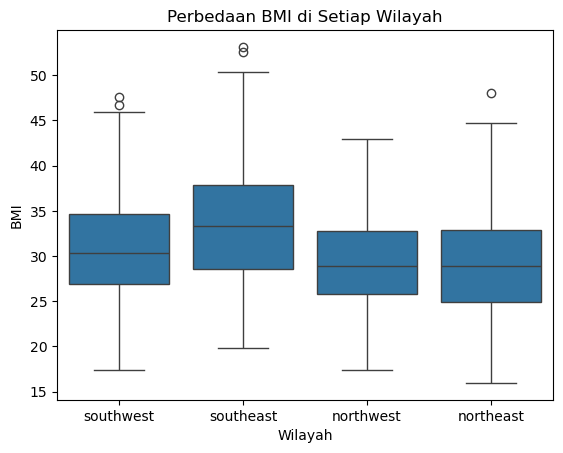

ANOVA BMI di setiap wilayah: F-stat=nan, p-value=nan
Eta Squared untuk perbedaan BMI di wilayah: nan
Tidak ada perbedaan signifikan dalam BMI antara wilayah yang berbeda.



/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [45]:
# 5. ANOVA untuk BMI di setiap region
sns.boxplot(x='region', y='bmi', data=df)
plt.title('Perbedaan BMI di Setiap Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('BMI')
plt.show()

# ANOVA
f_stat_bmi_region, p_value_bmi_region = stats.f_oneway(
    df[df['region'] == 'north']['bmi'],
    df[df['region'] == 'south']['bmi'],
    df[df['region'] == 'east']['bmi'],
    df[df['region'] == 'west']['bmi']
)

print(f"ANOVA BMI di setiap wilayah: F-stat={f_stat_bmi_region:.2f}, p-value={p_value_bmi_region:.2f}")

# Hitung Eta Squared untuk efek ukuran
eta_bmi_region = f_stat_bmi_region / (f_stat_bmi_region + 
    df[df['region'] == 'north']['bmi'].count() + 
    df[df['region'] == 'south']['bmi'].count() + 
    df[df['region'] == 'east']['bmi'].count() + 
    df[df['region'] == 'west']['bmi'].count() - 4)
print(f"Eta Squared untuk perbedaan BMI di wilayah: {eta_bmi_region:.2f}")

if p_value_bmi_region < 0.05:
    print("Ada perbedaan signifikan dalam BMI antara wilayah yang berbeda.\n")
else:
    print("Tidak ada perbedaan signifikan dalam BMI antara wilayah yang berbeda.\n")

### Hubungan antara Variabel Kategorikal 

#### Apakah proporsi perokok lebih tinggi di wilayah tertentu (region) dibandingkan wilayah lainnya?

Uji Chi-Square untuk proporsi perokok di setiap wilayah:
Chi-Square: 7.34, p-value: 0.06
Tidak ada perbedaan signifikan dalam proporsi perokok di setiap wilayah.



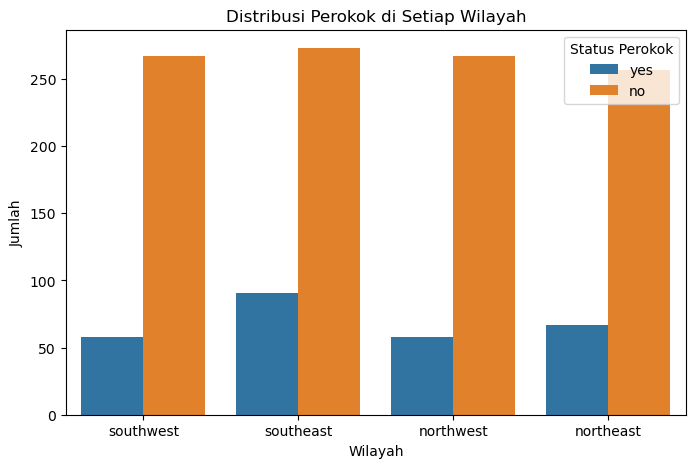

In [51]:


# Asumsi df sudah ada dan berisi data yang relevan

# Membuat tabel kontingensi untuk proporsi perokok di setiap wilayah
contingency_region_smoker = pd.crosstab(df['region'], df['smoker'])
chi2_region_smoker, p_value_region_smoker, _, _ = stats.chi2_contingency(contingency_region_smoker)

# Menampilkan hasil
print("Uji Chi-Square untuk proporsi perokok di setiap wilayah:")
print(f"Chi-Square: {chi2_region_smoker:.2f}, p-value: {p_value_region_smoker:.2f}")

if p_value_region_smoker < 0.05:
    print("Ada perbedaan signifikan dalam proporsi perokok di setiap wilayah.\n")
else:
    print("Tidak ada perbedaan signifikan dalam proporsi perokok di setiap wilayah.\n")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='region', hue='smoker', data=df)
plt.title('Distribusi Perokok di Setiap Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.legend(title='Status Perokok', loc='upper right')
plt.show()


#### Apakah terdapat lebih banyak perokok di antara laki-laki dibandingkan perempuan?

Uji Chi-Square untuk proporsi perokok berdasarkan jenis kelamin:
Chi-Square: 7.39, p-value: 0.01
Ada perbedaan signifikan dalam proporsi perokok berdasarkan jenis kelamin.



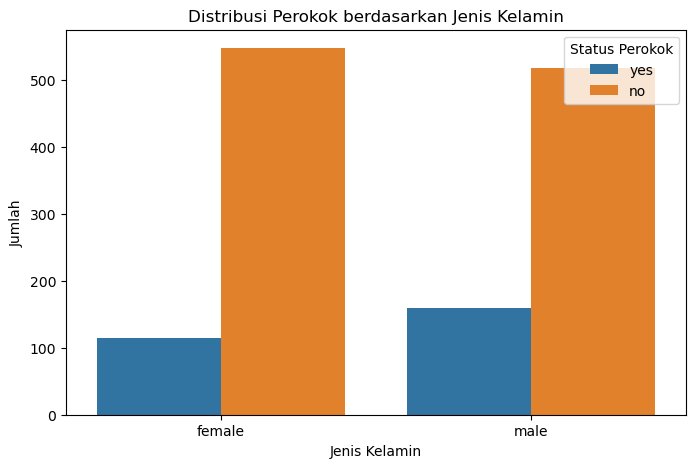

In [52]:
# Membuat tabel kontingensi untuk proporsi perokok berdasarkan jenis kelamin
contingency_sex_smoker = pd.crosstab(df['sex'], df['smoker'])
chi2_sex_smoker, p_value_sex_smoker, _, _ = stats.chi2_contingency(contingency_sex_smoker)

# Menampilkan hasil
print("Uji Chi-Square untuk proporsi perokok berdasarkan jenis kelamin:")
print(f"Chi-Square: {chi2_sex_smoker:.2f}, p-value: {p_value_sex_smoker:.2f}")

if p_value_sex_smoker < 0.05:
    print("Ada perbedaan signifikan dalam proporsi perokok berdasarkan jenis kelamin.\n")
else:
    print("Tidak ada perbedaan signifikan dalam proporsi perokok berdasarkan jenis kelamin.\n")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Distribusi Perokok berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(title='Status Perokok', loc='upper right')
plt.show()


#### Apakah distribusi jenis kelamin (sex) berbeda di setiap wilayah (region)?

Uji Chi-Square untuk distribusi jenis kelamin di setiap wilayah:
Chi-Square: 0.44, p-value: 0.93
Tidak ada perbedaan signifikan dalam distribusi jenis kelamin di setiap wilayah.



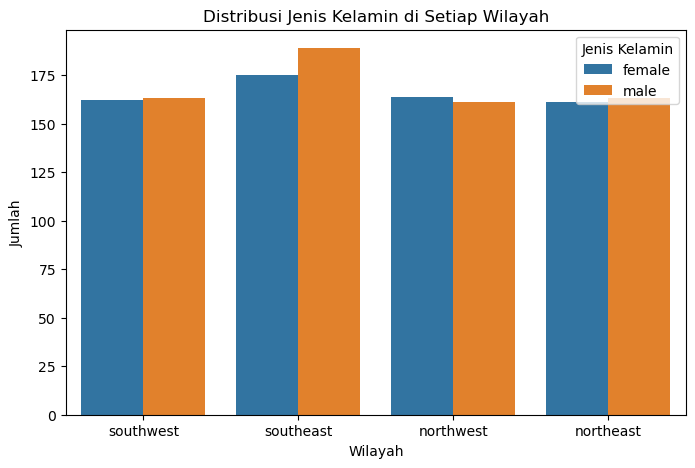

In [53]:
# Membuat tabel kontingensi untuk distribusi jenis kelamin di setiap wilayah
contingency_region_sex = pd.crosstab(df['region'], df['sex'])
chi2_region_sex, p_value_region_sex, _, _ = stats.chi2_contingency(contingency_region_sex)

# Menampilkan hasil
print("Uji Chi-Square untuk distribusi jenis kelamin di setiap wilayah:")
print(f"Chi-Square: {chi2_region_sex:.2f}, p-value: {p_value_region_sex:.2f}")

if p_value_region_sex < 0.05:
    print("Ada perbedaan signifikan dalam distribusi jenis kelamin di setiap wilayah.\n")
else:
    print("Tidak ada perbedaan signifikan dalam distribusi jenis kelamin di setiap wilayah.\n")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='region', hue='sex', data=df)
plt.title('Distribusi Jenis Kelamin di Setiap Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.legend(title='Jenis Kelamin', loc='upper right')
plt.show()

## EDA Summary

# Feature Engineering

## Cardinality

In [18]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,sex,2,"[female, male]"
1,smoker,2,"[yes, no]"
2,region,4,"[southwest, southeast, northwest, northeast]"


## Splitting Features and Target

## Splitting Between Train Set and Test Set

## Handling Duplicate Value

## Handling Outlier

## Handling Missing Values 

## Split Between Numeric Columns and Categorical Columns

## Feature Selection

## Feature Scaling

## Feature Encoding